In [304]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from typing import List
from linear_algebra import vector_mean

In [314]:
x_axis = [-6*random.random()+100 for i in range(1000)]
y_axis= [2*x + 5 + 2*random.gauss(0,1) for x in x_axis]

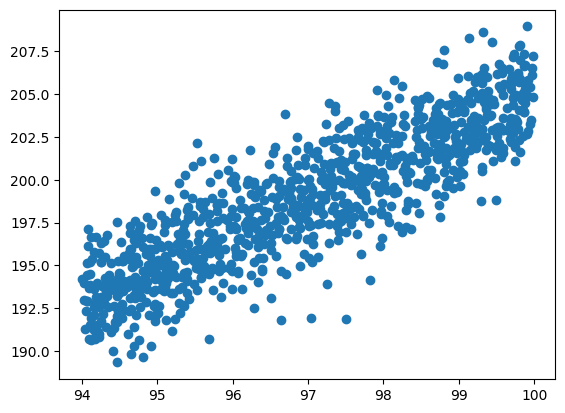

In [315]:
plt.scatter(x_axis, y_axis)

In [316]:
theta = [random.uniform(-1,1) for _ in range(2)]
print(theta)

[0.9251131787188978, 0.11091960545166901]


In [317]:
def linear_gradient(x:float, y:float, theta:List)->List:
    slope, intercept = theta
    error = ((slope*x + intercept)-y)
    return [ 2*error*x, 2*error]

In [318]:
def gradient_step(learning_rate:float, v:List, gradient:List)->List:
    step_taken = [learning_rate*grad for grad in gradient]
    return [z+w for (z,w) in zip(v, step_taken)]

In [319]:
def random_batch_gen(batch_size:int, x:List, y:List):
    indices = random.sample(range(len(x)), batch_size)

    return [(x[j], y[j]) for j in indices]

In [320]:
tolerance = 1e-3
def clip_gradient(gradient: List[float], max_magnitude: float = 1e2) -> List[float]:
    magnitude = sum(g**2 for g in gradient) ** 0.5
    if magnitude > max_magnitude:
        scale = max_magnitude / magnitude
        return [g * scale for g in gradient]
    return gradient


for epochs in range(10000):
    batch = random_batch_gen(10, x_axis,y_axis) 
    gradient = vector_mean([linear_gradient(x,y, theta) for (x,y) in batch])
    grad_magnitude = sum(g**2 for g in gradient) ** 0.5
    if grad_magnitude <tolerance:
        print("stopped early")
        break
    theta = gradient_step(-0.0001, theta, gradient)
    print(theta)

[3.0596413252017145, 0.13282185303482366]
[1.172903480137599, 0.11338337477168581]
[2.8338272620332248, 0.13049064697147078]
[1.356731476263203, 0.11529178960836707]
[2.6811926432971784, 0.12899319899214984]
[1.4829367105348032, 0.11672038954718855]
[2.540110836045667, 0.12764112616604859]
[1.6166327509649188, 0.11811094325977102]
[2.4410164224543323, 0.12659456410705017]
[1.7010607696152755, 0.11893443602396749]
[2.3650946900102636, 0.1257226577055727]
[1.7659800764873683, 0.11956393517567397]
[2.2958919801671174, 0.12500604801463605]
[1.8299194976089064, 0.12017903697102042]
[2.244111492877046, 0.12443499048047052]
[1.882757554409204, 0.12066914885778601]
[2.188676672880138, 0.12380928166143763]
[1.9412944394561311, 0.12124405447773473]
[2.1263023415235227, 0.12314377753036213]
[1.9846364486258012, 0.12168236704734463]
[2.1086768497958137, 0.12295815228256997]
[2.004321819301385, 0.12188521219134348]
[2.1154047187210305, 0.12302802541748632]
[2.0054279912319495, 0.12189358116965207]


In [321]:
slope,intercept = theta

x_list = [-6*random.random()+100 for i in range(1000)]
y_list = [slope*x + intercept for x in x_list]



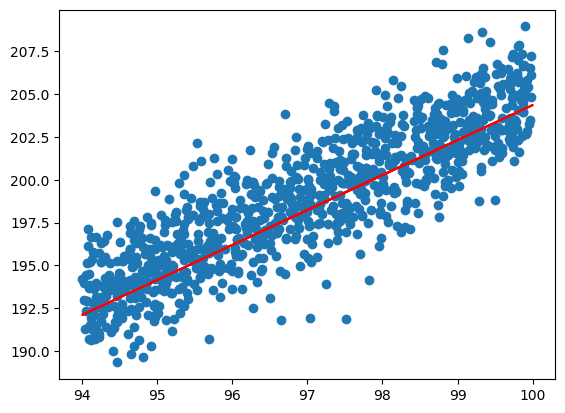

In [322]:
plt.scatter(x_axis, y_axis)
plt.plot(x_list, y_list, color='red')